# VIDUS Frequency of Use (FOU) GWAS PCA Eigenvector Selection
__Author__: Jesse Marks

This document logs the steps taken to calculate the percent variance explained by the top 10 PCA eigenvectors for a regression model with only the eigenvectors as explanatory variables. It is assumed that the phenotype and eigenvector data are readily available in PED format as outlined in the NGC protocol.

## Data wrangling

In [12]:
# Load PCA data
setwd('C:/Users/jmarks/Desktop/VIDUS/pheno/')
options(stringsAsFactors=F)
ea.cov.data <- read.delim("VIDUS_NGCW1_EUR_cov.ped", header=T, sep="\t")
ea.phen.data <- read.delim("VIDUS_NGCW1_EUR_phen.ped", header=T, sep="\t")

# Combine PCs and phenotype into one data frame
phen.name <- "fou"
pc.names <- paste0("PC", 1:10)
ea.data <- merge(x=ea.phen.data[,c("iid",phen.name)], y=ea.cov.data[, c("iid", paste0("PC",1:10))], by="iid")

## Regression analysis
We use a regression model of the general structure
\begin{align}
\text{FOU = PC1 + PC2 + ... + PC10}
\end{align}

In [13]:
# Build model formula
model.str <- paste0(phen.name, " ~ ", paste(pc.names, collapse=" + "))
cat("MODEL FORMULA:\n\n", model.str, "\n")

# Get model fits
lm.fit.ea <- lm(formula=as.formula(model.str), data=ea.data)

# Get sequential (type I) sum of squares
anova.ea <- anova(lm.fit.ea)

# Calculate percent variance explained and sort
ea.pve <- cbind(anova.ea[pc.names,], 
                PVE=round(anova.ea[pc.names, "Mean Sq"]/sum(anova.ea[pc.names, "Mean Sq"])*100, digits=2))
ea.pve.sorted <- ea.pve[order(ea.pve$PVE, decreasing=T),]

# Output regression info
cat("\n\n================ EA group ================")
summary(lm.fit.ea)
ea.pve.sorted

MODEL FORMULA:

 fou ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 


================ EA group ================


Call:
lm(formula = as.formula(model.str), data = ea.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.571  -8.621   1.943   7.801  24.328 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  47.5233     0.5929  80.158   <2e-16 ***
PC1          -1.5641    10.2693  -0.152    0.879    
PC2          -3.1801    10.2683  -0.310    0.757    
PC3          -7.4154    10.2685  -0.722    0.471    
PC4           1.7207    10.2688   0.168    0.867    
PC5          13.3181    10.2690   1.297    0.196    
PC6          15.5524    10.2687   1.515    0.131    
PC7         -14.7776    10.2685  -1.439    0.151    
PC8           3.2262    10.2687   0.314    0.754    
PC9          -2.6660    10.2691  -0.260    0.795    
PC10         -1.6727    10.2685  -0.163    0.871    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.27 on 289 degrees of freedom
Multiple R-squared:  0.02335,	Adjusted R-squared:  -0.01045 
F-statisti

,Df,Sum Sq,Mean Sq,F value,Pr(>F),PVE
PC6,1,241.883030,241.883030,2.29386575,0.1309790,33.21
PC7,1,218.391091,218.391091,2.07108305,0.1511971,29.98
PC5,1,177.314402,177.314402,1.68153770,0.1957546,24.34
PC3,1,55.003350,55.003350,0.52161700,0.4707367,7.55
PC8,1,10.409500,10.409500,0.09871711,0.7536013,1.43
PC2,1,10.111899,10.111899,0.09589486,0.7570359,1.39
PC9,1,7.106844,7.106844,0.06739682,0.7953503,0.98
PC4,1,2.964868,2.964868,0.02811694,0.8669515,0.41
PC10,1,2.798147,2.798147,0.02653586,0.8707124,0.38
PC1,1,2.447755,2.447755,0.02321296,0.8790109,0.34


__Note__: the top 3 PCs explain ~87.5% of the variance - PC {6,7,5}

## Percent Variance Explained Visualization

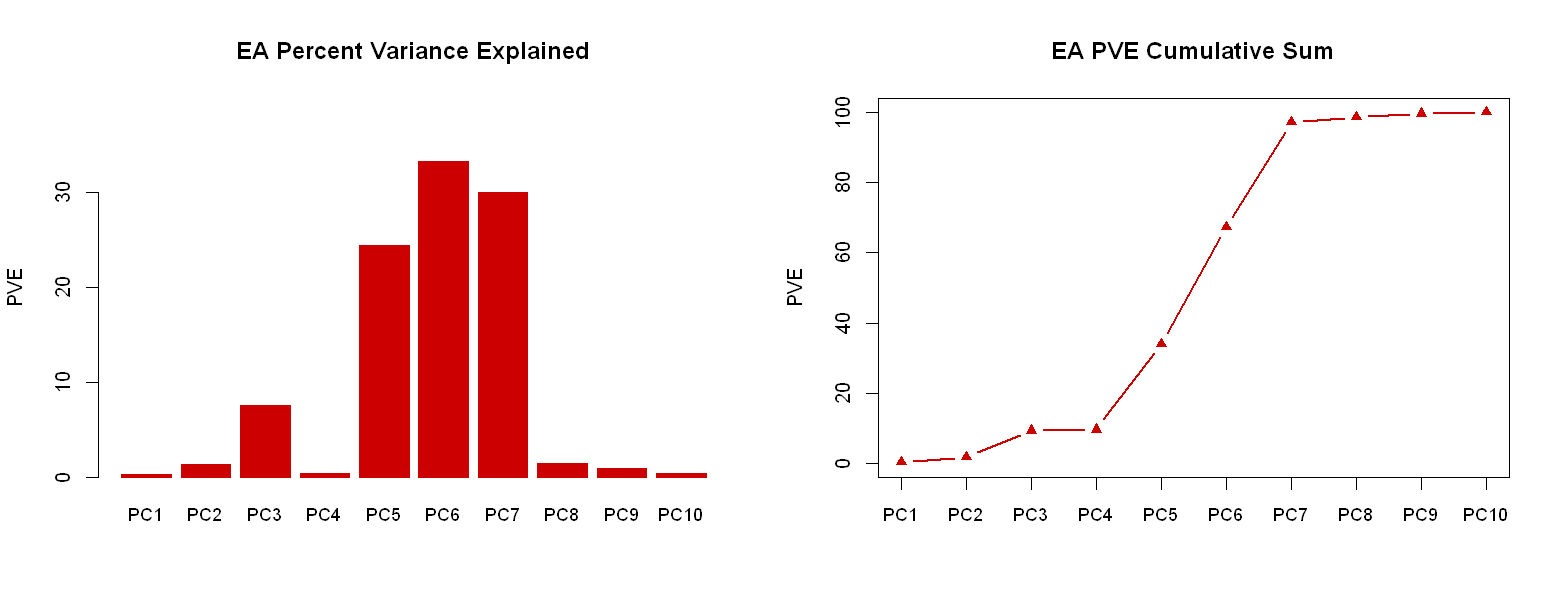

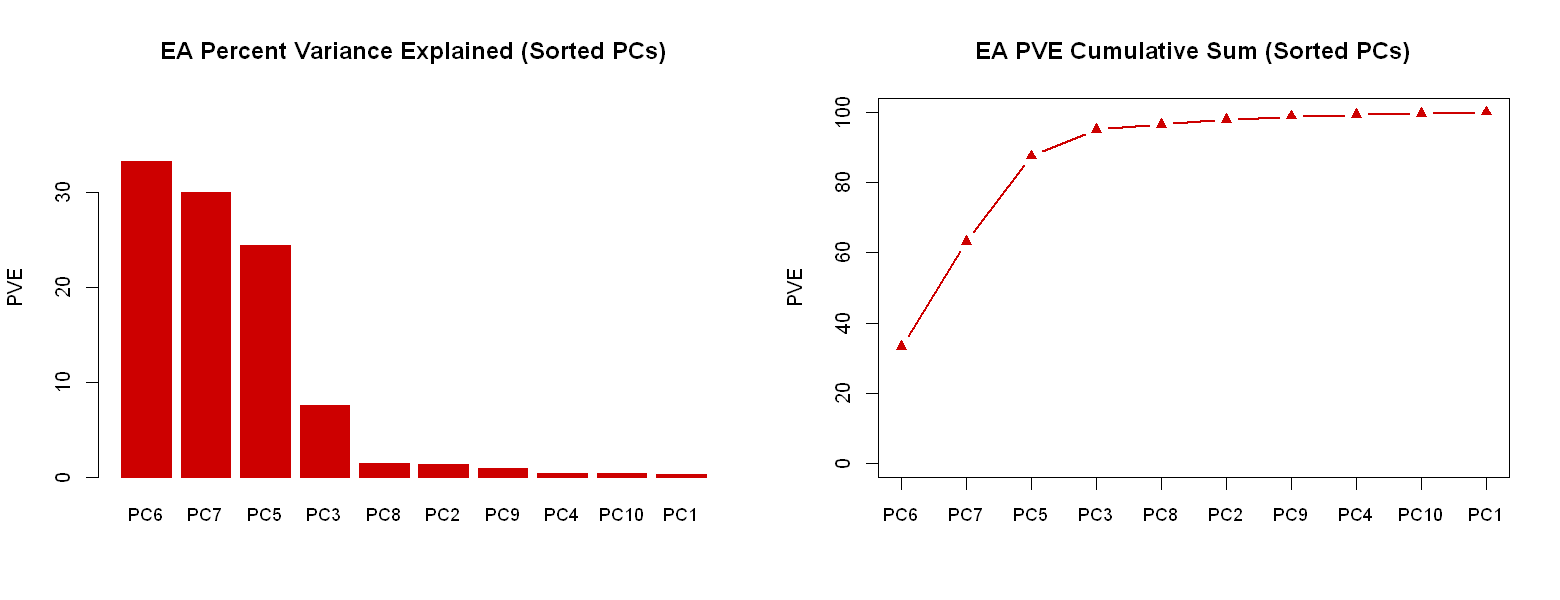

In [14]:
options(repr.plot.width=13, repr.plot.height=5)

# Set graphical parameters
cex.factor = 0.9
barplot.ylim.ea = c(0, max(ea.pve$PVE)*1.2)

# Visualize PVE
par(mfrow=c(1,2))
barplot(height=ea.pve$PVE, names.arg=rownames(ea.pve), beside=T, cex.names=cex.factor, 
        col="red3", border="red3", ylim=barplot.ylim.ea, 
        main="EA Percent Variance Explained", ylab="PVE")
plot(cumsum(ea.pve$PVE), type="b", main="EA PVE Cumulative Sum", ylab="PVE", 
     lwd=2, col="red3", pch=17, xaxt="n", xlab="", ylim=c(0,100))
axis(side=1, at=c(1:10), labels=rownames(ea.pve), cex.axis=cex.factor)

par(mfrow=c(1,2))
barplot(height=ea.pve.sorted$PVE, names.arg=rownames(ea.pve.sorted), beside=T, cex.names=cex.factor, 
        col="red3", border="red3", ylim=barplot.ylim.ea, main="EA Percent Variance Explained (Sorted PCs)", ylab="PVE")
plot(cumsum(ea.pve.sorted$PVE), type="b", main="EA PVE Cumulative Sum (Sorted PCs)", ylab="PVE", 
     lwd=2, col="red3", pch=17, xaxt="n", xlab="", ylim=c(0,100))
axis(side=1, at=c(1:10), labels=rownames(ea.pve.sorted), cex.axis=cex.factor)
